# My CNN 

## Dataset loading

In [1]:
import tensorflow as tf
import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## Download test

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [3]:
print ("Training data:")
print ("Number of examples: ", x_train.shape[0])
print ("Number of channels:",x_train.shape[3]) 
print ("Image size:", x_train.shape[1], x_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", x_test.shape[0])
print ("Number of channels:", x_test.shape[3])
print ("Image size:", x_test.shape[1], x_test.shape[2]) 

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


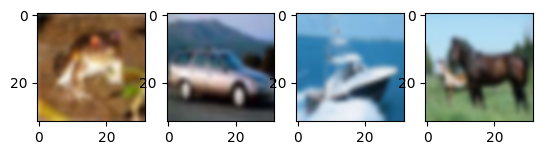

In [4]:
plt.subplot(141)
plt.imshow(x_train[0][:][:][:], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(x_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

## Standardization (traning set 건드린 값으로, test set도 정규화)

Original image
120.70756512369792 64.1500758911213
Standardization image
0.02981071092940454 0.9507954169009218


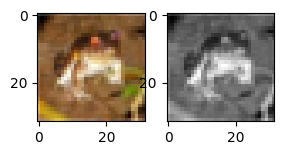

In [5]:
new_x_train = np.zeros([50000,32,32])
new_x_test = np.zeros([10000,32,32])
for i in range(50000):
    new_x_train[i] = cv2.cvtColor(x_train[i],cv2.COLOR_RGB2GRAY)
for i in range(10000):  
    new_x_test[i] = cv2.cvtColor(x_test[i],cv2.COLOR_RGB2GRAY)
    
_mean = np.mean(x_train)
_std = np.std(x_train)
print('Original image')
print(_mean, _std)
new_x_train = (new_x_train - _mean)/_std
new_x_test = (new_x_test - _mean)/_std
_mean = np.mean(new_x_train)
_std = np.std(new_x_train)
print('Standardization image')
print(_mean, _std)

plt.subplot(141)
plt.imshow(x_train[0])#, interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(new_x_train[0], cmap='gray')#[:][:], interpolation="bicubic")
plt.grid(False)
plt.show()

## Create My_CNN

In [6]:
model = tf.keras.models.Sequential([
  # 1st
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', strides=1, activation='relu', input_shape=(32, 32, 1)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
  
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', strides=1, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
  
  tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', strides=1, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),  
  tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

#tf.keras.utils.plot_model(model, to_file='model02.png', show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

2023-01-03 02:52:05.844320: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9942 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1


## Traning

In [7]:
val_scaled = new_x_test
val_target = y_test

history = model.fit(new_x_train, y_train, batch_size=256, epochs=25, validation_data=(val_scaled, val_target))
model.evaluate(new_x_test, y_test, batch_size=32, verbose=2)

Epoch 1/25


2023-01-03 02:52:07.989758: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


196/196 [==============================] - 5s 13ms/step - loss: 1.8003 - accuracy: 0.3607 - val_loss: 1.8435 - val_accuracy: 0.3983
Epoch 2/25
196/196 [==============================] - 2s 12ms/step - loss: 1.2969 - accuracy: 0.5448 - val_loss: 1.5876 - val_accuracy: 0.4828
Epoch 3/25
196/196 [==============================] - 2s 12ms/step - loss: 1.0753 - accuracy: 0.6233 - val_loss: 1.3916 - val_accuracy: 0.5748
Epoch 4/25
196/196 [==============================] - 2s 12ms/step - loss: 0.9414 - accuracy: 0.6716 - val_loss: 1.2939 - val_accuracy: 0.6279
Epoch 5/25
196/196 [==============================] - 2s 12ms/step - loss: 0.8567 - accuracy: 0.7030 - val_loss: 1.1801 - val_accuracy: 0.6547
Epoch 6/25
196/196 [==============================] - 2s 12ms/step - loss: 0.7856 - accuracy: 0.7260 - val_loss: 1.1683 - val_accuracy: 0.6903
Epoch 7/25
196/196 [==============================] - 2s 12ms/step - loss: 0.7141 - accuracy: 0.7508 - val_loss: 1.0757 - val_accuracy: 0.6969
Epoch 8/25

[0.7887162566184998, 0.7379000186920166]

## Benchmark

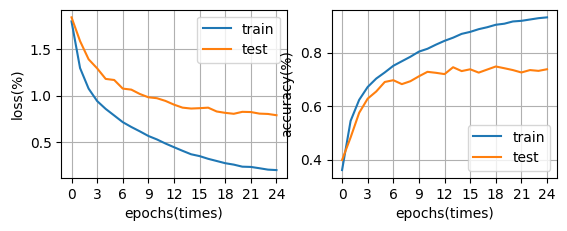

In [13]:
plt.subplot(221)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xticks(np.arange(0, 25, 3))
y1 = history.history['loss'][0]+0.3
y2 = history.history['loss'][-1]
#plt.yticks(np.arange(y1, y2, (y2-y1)/5))
plt.xlabel('epochs(times)')
plt.ylabel('loss(%)')
plt.legend(['train', 'test'])
#plt.show()
plt.subplot(222)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xticks(np.arange(0, 25, 3))
yy1 = history.history['accuracy'][0]
yy2 = history.history['accuracy'][-1]+0.2
#plt.yticks(np.arange(yy1, yy2, (yy2-yy1)/5))
plt.xlabel('epochs(times)')
plt.ylabel('accuracy(%)')
plt.legend(['train', 'test'])
plt.show()


## Result (Correct answer rate by object)

313/313 - 1s - loss: 0.7887 - accuracy: 0.7379 - 779ms/epoch - 2ms/step
Correct answer rate by object :
      airplane : 81.9 %
      automobile : 95.05 %
      bird : 60.88 %
      cat : 59.66 %
      deer : 55.54 %
      dog : 67.39 %
      frog : 75.93 %
      horse : 86.72 %
      ship : 82.58 %
      truck : 88.01 %

Max error diff : 39.508 %


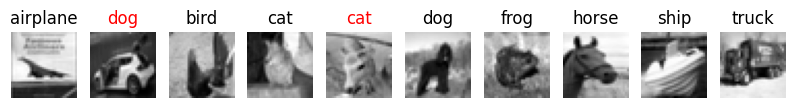

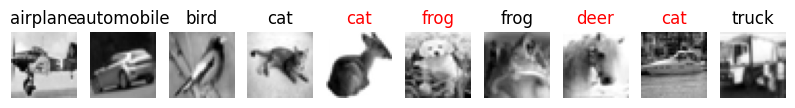

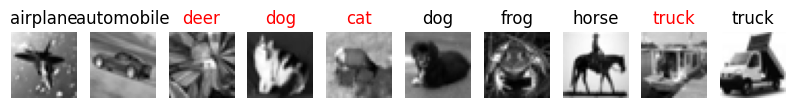

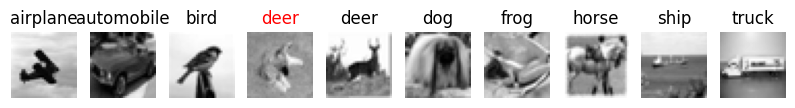

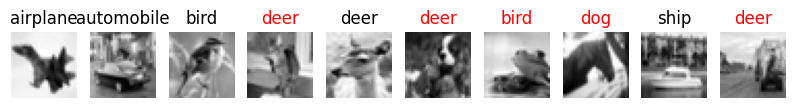

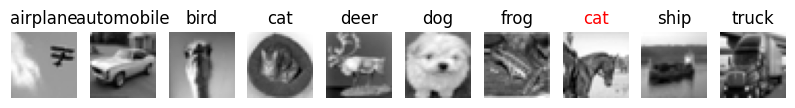

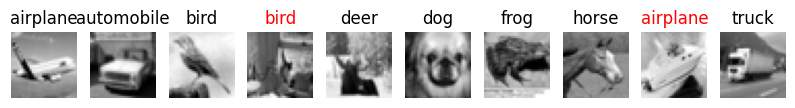

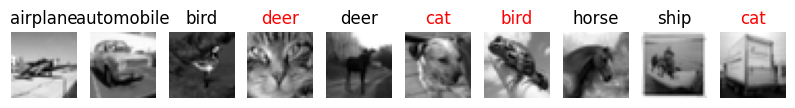

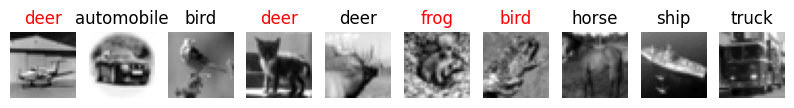

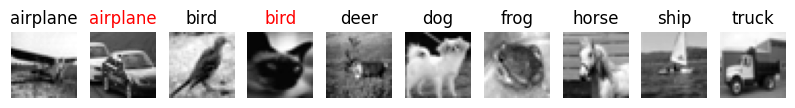

922


In [9]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

model.evaluate(new_x_test, y_test, batch_size=32, verbose=2)
dja = model(new_x_test)
dja = np.float64(dja)
tmp = np.zeros(10000)
index_accuracy_true = np.zeros(10)
index_accuracy_all = np.zeros(10)
for i in range(10000):
    tmp[i] = dja[i].argmax()
    if(tmp[i] == y_test[i]):
        index_accuracy_true[int(tmp[i])] += 1
    index_accuracy_all[int(tmp[i])] += 1

print('Correct answer rate by object :')
for i in range(10):
    print('     ', NAMES[i], ':', round(index_accuracy_true[i] / index_accuracy_all[i] * 100, 2), '%')

print()
print('Max error diff :', round(max(index_accuracy_true / index_accuracy_all * 100)-min(index_accuracy_true / index_accuracy_all * 100), 3), '%')

dja = tmp

def show_images(images, labels, times=1, ncols=10):
    _me = 0
    for j in range(times):
        figure, axs = plt.subplots(figsize=(ncols, 1), nrows=1, ncols=ncols)
        _index = 0
        for i in range(10000):
            i += _me 
            if(_index == y_test[i]):           
                # say false
                if(y_test[i] != labels[i]):
                    axs[_index].set_title(NAMES[int(labels[i])], color='red')
                # say true 
                else:
                    axs[_index].set_title(NAMES[int(labels[i])])
                axs[_index].imshow(images[i], cmap='gray')
                axs[_index].axis('off') 
                _index+=1
            elif(_index == 10):
                break
        plt.show()
        _me = i
    print(_me)

### Original image
#show_images(x_test, dja, times=10)
### Standardization image
show_images(new_x_test, dja, times=10)